In [7]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("/content/sample_data (1).csv")
train_df = train_df[pd.notnull(train_df['text'])] #removed null values shows only not null values
train_df = train_df[pd.notnull(train_df['label'])] #remove null values shows only not null values
train_df.head()

,text,label
0,zucker fabrik,ft
1,Lebensmittel kommssionierung,ft
2,geländer biegen,mr
3,gebäudeausrüstung technische,ct
4,kürbiskernöl softgels,ft


In [8]:
# check is there any null value present or not
train_df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
train_df.text.size   #check text size

37195

In [ ]:
train_df.label.size  #Check label size

37195

In [11]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()# How many examples of each class?


,text,label
10744,Robotergestütztes Fräsen,cnc
34076,Walzmaschinen hersteller,mr
848,innenausbau schiffsbau,ct
26041,Verpackungs druck,pkg
31462,tiefziehteile massenfertigung,mr


In [12]:
train_df['label'].value_counts()  #check different labels size present in dataset

ft     11226
pkg     9617
ct      5061
mr      5016
ch      3688
cnc     2587
Name: label, dtype: int64

In [13]:
# Mapping values for label
train_df['label'] = train_df['label'].map({'ft': 0, 'pkg': 1, 'ct': 2, 'mr': 3, 'ch': 4, 'cnc': 5})

In [14]:
train_df.head(10)

,text,label
0,zucker fabrik,0
1,Lebensmittel kommssionierung,0
2,geländer biegen,3
3,gebäudeausrüstung technische,2
4,kürbiskernöl softgels,0
5,Lebensmittel Organic Getränke,0
6,plastikflaschen abfälle,1
7,Knoblauch frisch,0
8,Lohnarbeiten für Druckguss,2
9,etiketten metall,1


Values are mapped to the labels it will easy to process data easily

**Data Visualization**

In [15]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

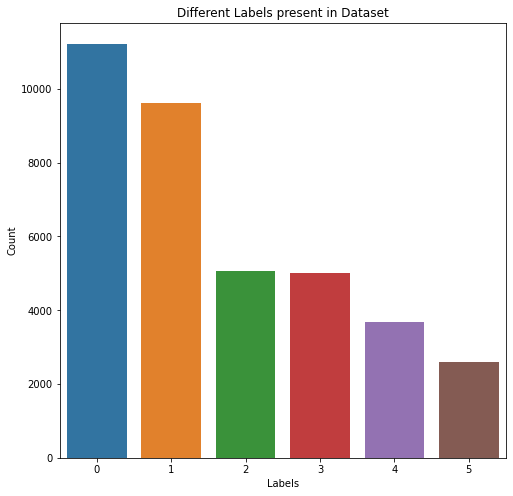

In [19]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=train_df)
p = plt.title('Different Labels present in Dataset')
p = plt.xlabel('Labels')
p = plt.ylabel('Count')

# Feature Engineering


In [20]:
# Creating new feature word_count
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

In [21]:
train_df.head()

,text,label,word_count
0,zucker fabrik,0,2
1,Lebensmittel kommssionierung,0,2
2,geländer biegen,3,2
3,gebäudeausrüstung technische,2,2
4,kürbiskernöl softgels,0,2


In [22]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_df, stratify = train_df['label'],  test_size = 0.2, random_state = 12) 
train['label'].value_counts()

0    8981
1    7693
2    4049
3    4013
4    2950
5    2070
Name: label, dtype: int64

In [23]:
test['label'].value_counts()

0    2245
1    1924
2    1012
3    1003
4     738
5     517
Name: label, dtype: int64

In [24]:
# How many samples total?
print(f"Total training samples: {len(train)}")
print(f"Total test samples: {len(test)}")
print(f"Total samples: {len(train) + len(test)}")

Total training samples: 29756
Total test samples: 7439
Total samples: 37195


In [25]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["label"].to_numpy(),
                                                                            test_size=0.2, # dedicate 20% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [26]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(29756, 29756, 7439, 7439)

In [27]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['obst und Gemüse  Quakenbrück', 'Pulver zum beschichten',
        'Lohnabfüllung von Ampullen für lebensmittel Lösungen',
        'carports aus aluminium kreis coburg', 'cornflakes bio',
        'kraftpapier doypack', 'Stanz und Biegeteile',
        'Bio-Saatgut erbsen', 'kantenschutz klemmprofile',
        'Plastik Flasche mit Druck'], dtype=object),
 array([0, 0, 1, 2, 0, 1, 5, 0, 1, 1]))

# Text vectorization (tokenization)

In [35]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [36]:
# Find average number of tokens (words) in training data
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

2

In [37]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [38]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [39]:
# Create sample sentence and tokenize it
sample_sentence = "Lebensmittel, amerikanische süssigkeiten"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   6,  896, 8048,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [40]:
# Choose a random sentence from the training dataset and tokenize it
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
pulver aus Yakwolle      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  20,    7, 6419,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [41]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens 
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'für', 'von', 'und']
Bottom 5 least common words: ['prozesstechniken', 'prozesstechhnik', 'prozessen', 'prozessautomatisierung', 'prozessanlagen']


# Creating an Embedding using an Embedding Layer


In [42]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [43]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
makronen bäcker      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04129913, -0.02865252, -0.01482606, ..., -0.00723407,
          0.01147431, -0.04768883],
        [-0.03245186,  0.01450691,  0.00827923, ..., -0.03481132,
         -0.03928901, -0.00051349],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [44]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04129913, -0.02865252, -0.01482606,  0.02823616,  0.01983162,
       -0.02139828,  0.0054974 , -0.00815241, -0.02882559, -0.02960945,
        0.04717665, -0.0131711 ,  0.00765377,  0.02874524, -0.00218536,
       -0.01546093,  0.03506589, -0.03050628, -0.03699159, -0.03670291,
       -0.03151255, -0.00612421, -0.01571156, -0.0040246 ,  0.03110925,
       -0.00775226,  0.03317303,  0.02348443, -0.04333979,  0.02058497,
        0.02832306,  0.0451092 , -0.01804615, -0.02063317,  0.03842965,
       -0.02030325, -0.01354517,  0.01424891, -0.00225397, -0.00589752,
       -0.0257404 , -0.00145662, -0.02541131,  0.02171041, -0.02905586,
       -0.00517354,  0.04836161, -0.04359684, -0.03478447, -0.04610673,
       -0.00359074,  0.02792999, -0.01724799,  0.04764486,  0.01574698,
        0.01908528, -0.02474741,  0.03719355,  0.02348651,  0.04299246,
        0.03594892,  0.02978529, -0.02894433, -0.00523807, -0.01423055,
        0.026473

# Modelling a text dataset
## Model 0: Create Base Model to compare our model result with sequential model and functional model 


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [46]:
baseline_score = model_0.score(val_sentences, val_labels)  #check score 
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 84.96%


In [47]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([3, 1, 2, 1, 3, 0, 0, 0, 5, 4, 5, 0, 3, 1, 1, 0, 2, 3, 0, 3])

In [48]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [49]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 84.95765559887082,
 'f1': 0.8469521198478849,
 'precision': 0.8587417427958923,
 'recall': 0.8495765559887082}

# Model 1: A simple dense model


In [66]:
# create  callback function
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [67]:
# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

## Functional Api Model 

In [68]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="softmax")(x) # create the output layer, want multiclass outputs so use softmax activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [69]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [70]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [71]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220313-211623
Epoch 1/5
930/930 [==============================] - 10s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 6s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 7s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [72]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

233/233 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2565


[0.0, 0.25648608803749084]

In [73]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 5.81170702e+00, -5.83500385e+00,  5.91255665e+00, ...,
         -5.82514811e+00, -5.79759169e+00, -5.82825232e+00],
        [ 4.83188629e+00, -4.85764074e+00,  4.86468887e+00, ...,
         -4.79368067e+00, -4.76816130e+00, -4.79090071e+00],
        [ 3.85223651e+00, -3.82239866e+00,  3.92932963e+00, ...,
         -3.87642097e+00, -3.86405087e+00, -3.85277367e+00],
        ...,
        [-3.30144390e-02, -5.24929911e-03, -4.20972481e-02, ...,
          2.02876367e-02,  3.08806822e-03,  2.21579187e-02],
        [ 1.81000382e-01, -1.16197020e-01,  1.47846028e-01, ...,
         -1.49515927e-01, -1.06089756e-01, -1.33390650e-01],
        [-8.85692164e-02,  1.13592066e-01, -1.29945204e-01, ...,
          1.65185720e-01,  9.72599015e-02,  7.19661489e-02]], dtype=float32)>]

In [76]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [77]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)>

In [78]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [79]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [80]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


# Visualizing learned embeddings


In [81]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000,
 ['',
  '[UNK]',
  'für',
  'von',
  'und',
  'cnc',
  'lebensmittel',
  'aus',
  'kunststoff',
  'verpackung'])

In [82]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

# Recurrent Neural Networks (RNN's)


## Model 2: LSTM


In [83]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [84]:
# Compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [85]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [86]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220313-211943
Epoch 1/5
930/930 [==============================] - 15s 12ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 11s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 11s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 11s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 11s 12ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [87]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((7439, 1), array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [88]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [89]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [90]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


# Convolutional Neural Networks for Text


# Model 3: Conv1D

In [91]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [92]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 4.8318863e+00, -4.8576407e+00,  4.8646889e+00, ...,
          -4.7936807e+00, -4.7681613e+00, -4.7909007e+00],
         [ 4.8318863e+00, -4.8576407e+00,  4.8646889e+00, ...,
          -4.7936807e+00, -4.7681613e+00, -4.7909007e+00],
         [ 5.4258682e-02,  4.4895750e-03, -1.6194319e-02, ...,
          -6.3130297e-02, -2.2257930e-02, -2.5315568e-02],
         ...,
         [ 5.8117070e+00, -5.8350039e+00,  5.9125566e+00, ...,
          -5.8251481e+00, -5.7975917e+00, -5.8282523e+00],
         [ 5.8117070e+00, -5.8350039e+00,  5.9125566e+00, ...,
          -5.8251481e+00, -5.7975917e+00, -5.8282523e+00],
         [ 5.8117070e+00, -5.8350039e+00,  5.9125566e+00, ...,
          -5.8251481e+00, -5.7975917e+00, -5.8282523e+00]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[ 0.        ,  0.8866627 ,  0.        ,  3.4095693 ,
           0.        ,  0.        ,  6.6396303 ,  7.9843364 ,
  

In [93]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Conv1D")

# Compile Conv1D model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr = 0.1),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_3.summary()

Model: "model_3_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 64)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220313-212343
Epoch 1/5
930/930 [==============================] - 10s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 8s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 8s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 8s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 9s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [95]:
# Make predictions with model_3
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [96]:
# Convert model_3 prediction probabilities to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [97]:
# Calculate model_3 evaluation metrics 
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [98]:
# Compare model_3 results to baseline 
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


In [99]:
# Setting up text vectorization 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 10000 
max_length = 15 

text_vectorizer = TextVectorization(max_tokens = max_vocab_length , 
                                    output_mode = 'int', 
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

# Creating a embedding layer 
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim= max_vocab_length , 
                             output_dim = 128 , 
                             embeddings_initializer = 'uniform', 
                             input_length = max_vocab_length)

# 1. Rebuild, compile and train model_1, model_2 and model_3 using the Keras Sequential API instead of the Functional API.


In [100]:
# Building the model 1 (A simple Dense model)
model_4 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'softmax')
    ])
    
# Compiling the model 
model_4.compile(loss="categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_4_history =  model_4.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
930/930 [==============================] - 8s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 7s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 7s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [101]:
# Make predictions with model_4
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [102]:
# Convert model_4 prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [103]:
# Calculate model_4 evaluation metrics 
model_4_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_4_preds)
model_4_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [104]:
# Compare model_4 results to baseline 
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


In [105]:
# Building the model 5 (An LSTM model)
model_5 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.LSTM(64), 
    #layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'softmax')
    ])
    
# Compiling the model 
model_5.compile(loss="categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_5_history =  model_5.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
930/930 [==============================] - 14s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 10s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 10s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 10s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 10s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [106]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [107]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [108]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [109]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


# Model_6

In [110]:
# Building the model 6 (Conv1D Model)

model_6 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.Conv1D(32 , 5 , activation= 'relu'),
    layers.GlobalMaxPool1D() , 
    layers.Dense(1, activation = 'softmax')
    ])
    
# Compiling the model 
model_6.compile(loss="categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_6_history =  model_6.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
930/930 [==============================] - 9s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 2/5
930/930 [==============================] - 8s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 3/5
930/930 [==============================] - 8s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 4/5
930/930 [==============================] - 8s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565
Epoch 5/5
930/930 [==============================] - 8s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2591 - val_loss: 0.0000e+00 - val_accuracy: 0.2565


In [111]:
# Make predictions with model_6
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [112]:
# Convert model_6 prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [113]:
# Calculate model_6 evaluation metrics 
model_6_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_6_preds)
model_6_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 25.648608683962898,
 'f1': 0.10471283913341436,
 'precision': 0.0657851127423057,
 'recall': 0.256486086839629}

In [114]:
# Compare model_6 results to baseline 
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 84.96, New accuracy: 25.65, Difference: -59.31
Baseline precision: 0.86, New precision: 0.07, Difference: -0.79
Baseline recall: 0.85, New recall: 0.26, Difference: -0.59
Baseline f1: 0.85, New f1: 0.10, Difference: -0.74


# Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

In [115]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [116]:
# Getting the model predictions 

def give_preds(model, test_sentences):
  pred_probs = model.predict(test_sentences)
  preds = tf.squeeze(tf.round(pred_probs))
  preds = tf.cast(preds , dtype = tf.int32)

  return preds

I tried different models but the accuracy and f1 score is so less. I checked the based model confusion matrix

In [117]:
# Predictions on the validation sentences 
val_preds = give_preds(model_0, val_sentences) 

# Creating a array of our class names 
class_names = ['ft' , 'pkg', 'ct', 'mr', 'ch', 'cnc']

# Checking the preds and true labels shape
val_preds.shape , val_labels.shape

(TensorShape([7439]), (7439,))

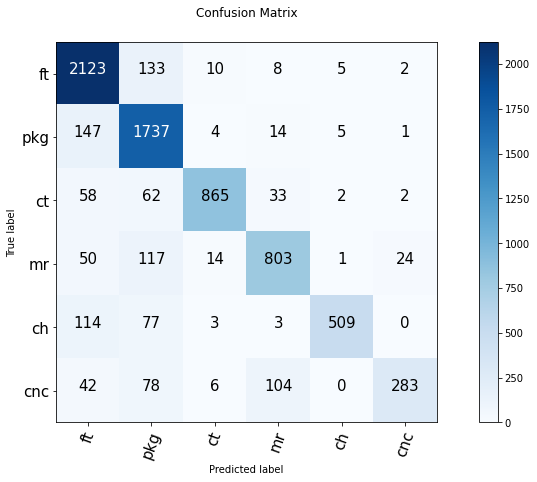

In [118]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true= val_labels , 
                      y_pred = val_preds , 
                      classes = class_names , 
                      figsize= (15 , 7), 
                      norm = False , 
                      savefig = True , 
                      text_size = 15)

# Comparing the performance of each of our models


In [119]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "conv1d": model_3_results,
                                  "simple_dense_seq_API": model_4_results,
                                  "lstm_seq_API": model_5_results,
                                  "conv1d_seq_API": model_6_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,84.957656,0.858742,0.849577,0.846952
simple_dense,25.648609,0.065785,0.256486,0.104713
lstm,25.648609,0.065785,0.256486,0.104713
conv1d,25.648609,0.065785,0.256486,0.104713
simple_dense_seq_API,25.648609,0.065785,0.256486,0.104713
lstm_seq_API,25.648609,0.065785,0.256486,0.104713
conv1d_seq_API,25.648609,0.065785,0.256486,0.104713


In [120]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

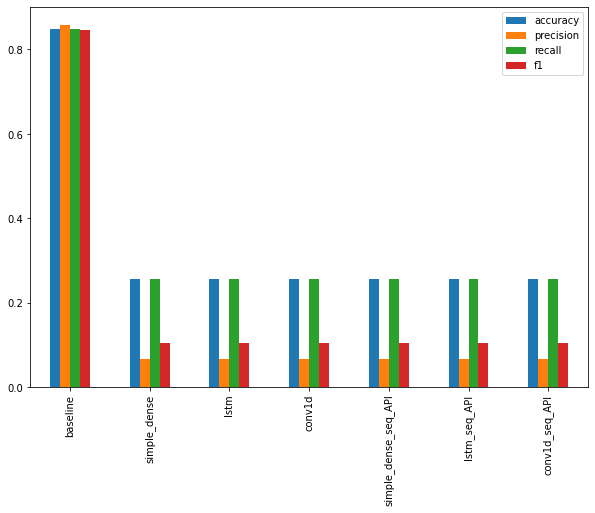

In [121]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

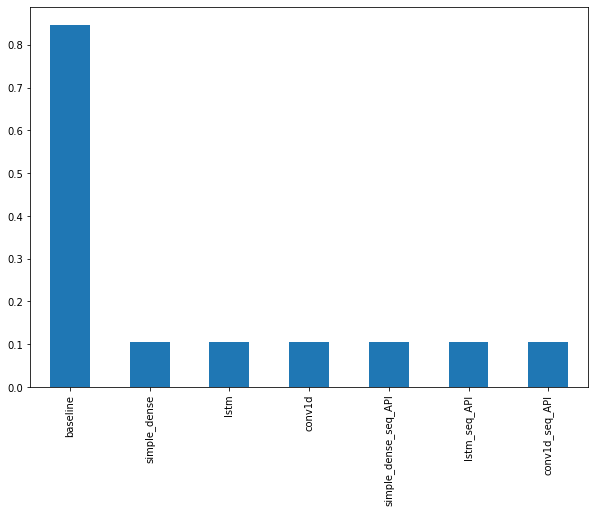

In [122]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

# Saving and loading a trained model

In [123]:
import pickle


In [128]:
# Save an existing model to file
pickle.dump(model_3, open("model_3.pkl", "wb"))
#Saving the Model
model_version=1
model_3.save(f"D:\Seema project/{model_version}")

INFO:tensorflow:Assets written to: ram://272aabf9-1377-40a2-a418-ce5f664f6c41/assets
INFO:tensorflow:Assets written to: D:\Seema project/1/assets


**I build 3 Sequential models and 3 Functional Models but, Unfortunately, The accuracy is so less and no any model has defeat the base model score i will deploy this model in flask**